In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mlp
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("air-quality-india.csv")
data 

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [3]:
data.drop('Timestamp',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    36192 non-null  int64  
 1   Month   36192 non-null  int64  
 2   Day     36192 non-null  int64  
 3   Hour    36192 non-null  int64  
 4   PM2.5   36192 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.4 MB


In [4]:
for i in data.columns:
    print(data[i].unique(),"\n")

[2017 2018 2019 2020 2021 2022] 

[11 12  1  2  3  4  5  6  7  8  9 10] 

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
  1  2  3  4  5  6 31] 

[12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11] 

[64.51 69.95 92.79 ... 38.84 49.64 51.2 ] 



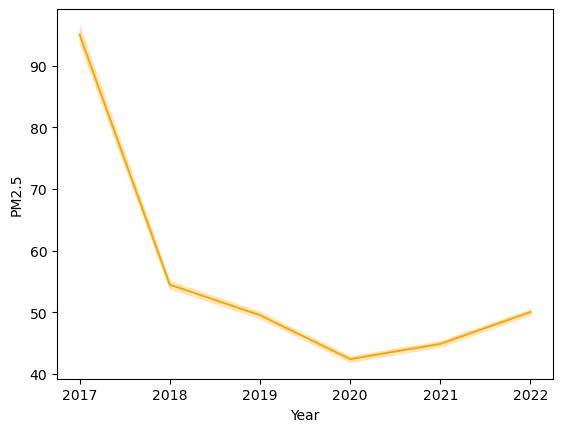

In [5]:
sns.lineplot(data,x=data['Year'],y=data['PM2.5'],color='Orange')
mlp.show()

In [6]:
x=data.drop("PM2.5",axis=1)
y=data['PM2.5']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x

,Year,Month,Day,Hour
0,2017,11,7,12
1,2017,11,7,13
2,2017,11,7,14
3,2017,11,7,15
4,2017,11,7,16
...,...,...,...,...
36187,2022,6,4,11
36188,2022,6,4,12
36189,2022,6,4,13
36190,2022,6,4,14


In [9]:
y

0         64.51
1         69.95
2         92.79
3        109.66
4        116.50
          ...  
36187     35.89
36188     33.83
36189     33.05
36190     35.29
36191     40.67
Name: PM2.5, Length: 36192, dtype: float64

In [10]:
import xgboost as xgb
model = xgb.XGBRegressor(use_label_encoder=False, eval_metric='logloss')
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [11]:
model.score(x_train,y_train)

0.9487659002939572

In [12]:
model.fit(x_test,y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [13]:
model.score(x_test,y_test)

0.9666709859421517

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ann_model= Sequential()
ann_model.add(Dense(64, input_dim=4, activation='relu')) 
ann_model.add(Dense(32, activation='relu'))                 
ann_model.add(Dense(1,activation='linear'))
ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [15]:
ann_model.fit(x_train,y_train,epochs=150,validation_batch_size=0.2)

Epoch 1/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3222.5039 - mae: 32.3381
Epoch 2/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 628.9816 - mae: 20.2064
Epoch 3/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 635.4785 - mae: 20.3523
Epoch 4/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 636.6699 - mae: 20.3233
Epoch 5/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 649.8430 - mae: 20.4888
Epoch 6/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 643.0402 - mae: 20.3728
Epoch 7/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 601.1478 - mae: 19.6504
Epoch 8/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 559.2036 - mae: 18.7276
Epoch 9/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 502.2853 - mae: 17.5317
Epoch 10/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 454.3680 - mae: 16.4804
Epoch 11/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 359.0153 - mae: 14.3962
Epoch 12/150
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 

In [18]:
y_pred= ann_model.predict(x_test)

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.6994416493571268
